In [1]:
#! /usr/bin/env python

import random
import numpy as np
import matplotlib.pyplot as plt
import time

from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
def phi(x, y, L):
    """Edge function."""
    assert x == 0 or x == L or y == 0 or y == L
    if x == 0 or x == L:
        return 1
    return 0

In [3]:
def value_on_point_reached(x, y, L, beta):
    """x, y: integer coordinates of start point (in square [0,L-1]x[0,L-1]).
    Simulate one random walk from the start point and return the value of the
    edge function when the edge is reached, multiplied by exp(-beta*time needed to reach the edge)."""
    
    time_before_edge = 0
    while  (x != 0 and x != L and y != 0 and y != L):  # while not on an edge
        time_before_edge += 1
        rand = random.random()
        # Go with equal probability left, up, right or down
        if 0 <= rand < 0.25:
            x -= 1
        elif 0.25 <= rand < 0.5:
            x += 1
        elif 0.5 <= rand < 0.75:
            y -= 1
        else:
            y += 1
    # We have now reached an edge.
    return phi(x, y, L) * np.exp(-beta*time_before_edge)

In [4]:
def monte_carlo(x, y, L, alpha, K):
    """Simulate K times on point (x, y) and return the average result."""
    sum = 0
    for _ in range(K):
        sum += value_on_point_reached(x, y, L, alpha)
    return sum/K

In [5]:
def approximate_solution(L, alpha, K):
    start = time.time()
    averages = np.zeros((L, L))
    for x in range(L):
        for y in range(L):
            averages[x][y] = monte_carlo(x, y, L, alpha, K)
    print("time L = {} K = {} gamma = {}: {:.2f}s".format(L, K, alpha*L**2, time.time() - start))
    return averages

In [6]:
def plot_approximate_solution(L, alpha, K):
    plt.imshow(approximate_solution(L, alpha, K).T, origin="lower",
               extent=[0, 1, 0, 1], cmap="jet")
    plt.show()

time L = 30 K = 100 gamma = 100.0: 5.39s


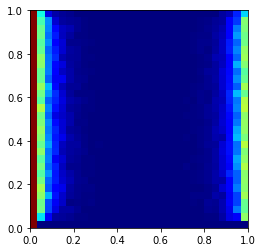

In [7]:
def test():
    """Main function."""
    L = 30  # discretize with squares of length 1/L
    K = 100  # number of simulations per point to compute the average result
    gamma = 100
    alpha = gamma/L**2
    plot_approximate_solution(L, alpha, K)
    
if __name__ == "__main__":
    test()